In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
orders = pd.read_csv('Case Study - Logistics Analytics - data - CSVs/orders.csv')
contacts = pd.read_csv('Case Study - Logistics Analytics - data - CSVs/contacts.csv')
deliveries = pd.read_csv('Case Study - Logistics Analytics - data - CSVs/deliveries.csv')
cancellations = pd.read_csv('Case Study - Logistics Analytics - data - CSVs/cancellations.csv')

In [3]:
orders.head()

,country_code,enc_order_id,enc_customer_id,vertical,order_placed_at,status,order_value
0,MY,e3efd320f9b7,44d967520153,Restaurants,2021-03-29 04:50:36 UTC,DELIVERED,2.00
1,MY,7147c1ffac6f,96848de95c01,Restaurants,2021-03-27 07:49:51 UTC,DELIVERED,2.07
2,MY,79343f6c20af,2e0142712577,Groceries,2021-03-03 08:25:52 UTC,DELIVERED,2.74
3,MY,439217952d53,fc8759fabaa8,Restaurants,2021-03-16 05:32:37 UTC,DELIVERED,2.04
4,MY,3eeb2e8008b5,13e582c8cd6d,Restaurants,2021-03-24 07:22:14 UTC,DELIVERED,2.90


In [4]:
print ('The data has {0} rows and {1} columns'.format(orders.shape[0],orders.shape[1]))

The data has 3460862 rows and 7 columns


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460862 entries, 0 to 3460861
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_code     object 
 1   enc_order_id     object 
 2   enc_customer_id  object 
 3   vertical         object 
 4   order_placed_at  object 
 5   status           object 
 6   order_value      float64
dtypes: float64(1), object(6)
memory usage: 184.8+ MB


In [6]:
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'],format='mixed')

min_date = orders['order_placed_at'].min()
max_date = orders['order_placed_at'].max()

print(f"Order data ranges from {min_date.date()} to {max_date.date()}")

Order data ranges from 2021-03-01 to 2021-03-31


### selecting duplicate rows except first; occurrence based on all columns

In [7]:
duplicate = orders[orders.duplicated()]
print("Duplicate Rows:", duplicate.shape[0])

Duplicate Rows: 0


### check missing values

In [8]:
orders.columns[orders.isnull().any()]

Index(['enc_customer_id', 'vertical'], dtype='object')

### missing value counts in each of these columns

In [9]:
miss = orders.isnull().sum()/len(orders)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

enc_customer_id    0.000005
vertical           0.000005
dtype: float64

In [10]:
orders['enc_order_id'].nunique()

3460859

In [11]:
orders['status'].unique()

array(['DELIVERED', 'CANCELLED'], dtype=object)

In [12]:
orders[orders['vertical'].isnull()==True]['status'].unique()

array(['CANCELLED'], dtype=object)

In [13]:
orders['country_code'].value_counts()

country_code
TH    1754447
MY    1706415
Name: count, dtype: int64

In [14]:
(orders['country_code'].value_counts() / orders.shape[0]) * 100

country_code
TH    50.693931
MY    49.306069
Name: count, dtype: float64

### Order Distribution by Country

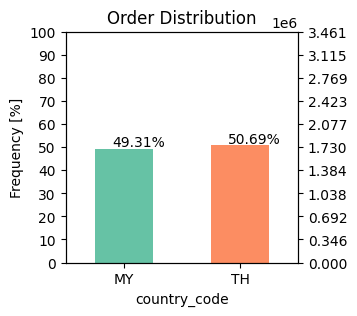

In [15]:
plt.figure(figsize = (3, 3))
plt.title('Order Distribution')
plt.ylabel('Frequency [%]')
c_percent = orders.country_code.value_counts(normalize=True).sort_index() * 100
colors = sns.color_palette("Set2", n_colors=len(c_percent))

ax = (orders.country_code.value_counts()/len(orders)*100).sort_index().plot(kind = "bar", rot = 0, color = colors)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(orders)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [16]:
orders.groupby('country_code')['status'].value_counts()

country_code  status   
MY            DELIVERED    1630590
              CANCELLED      75825
TH            DELIVERED    1704552
              CANCELLED      49895
Name: count, dtype: int64

In [17]:
orders['vertical'].value_counts() 

vertical
Restaurants    3317927
Local shops      76960
Groceries        65957
Name: count, dtype: int64

In [18]:
orders.groupby('vertical')['status'].value_counts()

vertical     status   
Groceries    DELIVERED      63954
             CANCELLED       2003
Local shops  DELIVERED      63303
             CANCELLED      13657
Restaurants  DELIVERED    3207885
             CANCELLED     110042
Name: count, dtype: int64

### Order Distribution by vertical

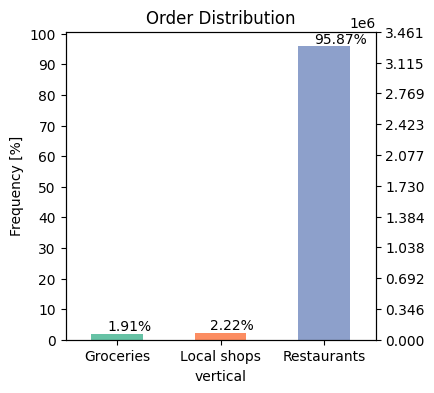

In [19]:
plt.figure(figsize = (4, 4))
plt.title('Order Distribution')
plt.ylabel('Frequency [%]')

c_percent = orders.vertical.value_counts(normalize=True).sort_index() * 100
colors = sns.color_palette("Set2", n_colors=len(c_percent))


ax = (orders.vertical.value_counts()/len(orders)*100).sort_index().plot(kind = "bar", rot = 0, color = colors)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(orders)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [20]:
orders['order_value'].describe()

count    3.460862e+06
mean     2.196851e+00
std      4.916334e+00
min      0.000000e+00
25%      7.300000e-01
50%      1.510000e+00
75%      2.820000e+00
max      4.673280e+03
Name: order_value, dtype: float64

In [21]:
orders['status'].value_counts() 

status
DELIVERED    3335142
CANCELLED     125720
Name: count, dtype: int64

In [22]:
(orders['status'].value_counts() / orders.shape[0]) * 100

status
DELIVERED    96.367379
CANCELLED     3.632621
Name: count, dtype: float64

### Order Distribution by Status

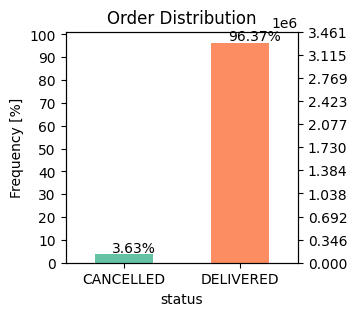

In [23]:
plt.figure(figsize = (3, 3))
plt.title('Order Distribution')
plt.ylabel('Frequency [%]')
c_percent = orders.status.value_counts(normalize=True).sort_index() * 100
colors = sns.color_palette("Set2", n_colors=len(c_percent))

ax = (orders.status.value_counts()/len(orders)*100).sort_index().plot(kind = "bar", rot = 0, color=colors)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(orders)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [24]:
orders['enc_customer_id'].count()

3460844

In [25]:
a = orders['order_value'].quantile(0.99)
b = orders[orders['order_value']<a]

In [26]:
b['order_value'].describe()

count    3.426190e+06
mean     2.047979e+00
std      1.894432e+00
min      0.000000e+00
25%      7.200000e-01
50%      1.490000e+00
75%      2.760000e+00
max      1.146000e+01
Name: order_value, dtype: float64

In [27]:
b.groupby('status')['order_value'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
CANCELLED,123435.0,2.210934,2.101793,0.0,0.69,1.60,3.07,11.46
DELIVERED,3302755.0,2.041889,1.885968,0.0,0.72,1.49,2.75,11.46


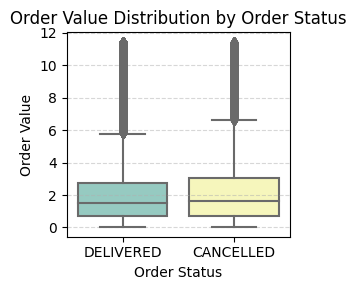

In [28]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=b, x='status', y='order_value', palette='Set3')

plt.title('Order Value Distribution by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Order Value')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
orders[orders['order_value']==0]['enc_order_id'].count()

13504

In [30]:
orders[orders['order_value']==0]['status'].value_counts()

status
DELIVERED    7862
CANCELLED    5642
Name: count, dtype: int64

# Cancellation Data

In [31]:
cancellations.head()

,country_code,enc_order_id,cancelled_at,cancellation_owner
0,MY,7f48cfad6f3e,2021-03-19 03:30:25.821513 UTC,RIDER
1,MY,de62141de53c,2021-03-13 15:29:42.489059 UTC,RIDER
2,MY,52330aa0cdfc,2021-03-07 08:04:49.207259 UTC,RIDER
3,MY,61f1a503c320,2021-03-01 06:41:39.20716 UTC,RIDER
4,MY,dbfc4a08b79e,2021-03-28 08:14:23.857005 UTC,RIDER


In [32]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = cancellations[cancellations.duplicated()]
print("Duplicate Rows:", duplicate.shape[0])

Duplicate Rows: 0


In [33]:
## check missing values
cancellations.columns[cancellations.isnull().any()]

Index([], dtype='object')

In [34]:
cancellations[cancellations['enc_order_id'].duplicated()]

,country_code,enc_order_id,cancelled_at,cancellation_owner


In [35]:
cancellations['cancellation_owner'].value_counts() 

cancellation_owner
CUSTOMER    42409
VENDOR      38264
RIDER       34877
PLATFORM       20
Name: count, dtype: int64

In [36]:
(cancellations['cancellation_owner'].value_counts() / cancellations.shape[0]) * 100

cancellation_owner
CUSTOMER    36.695509
VENDOR      33.108938
RIDER       30.178247
PLATFORM     0.017306
Name: count, dtype: float64

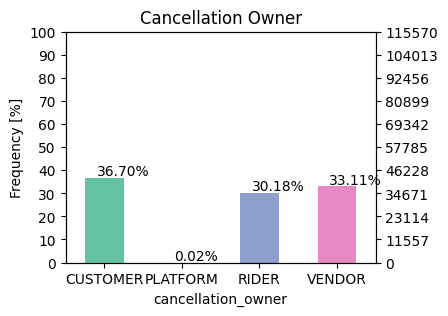

In [37]:
plt.figure(figsize = (4, 3))
plt.title('Cancellation Owner')
plt.ylabel('Frequency [%]')
c_percent = cancellations['cancellation_owner'].value_counts(normalize=True).sort_index() * 100
colors = sns.color_palette("Set2", n_colors=len(c_percent))
ax = (cancellations.cancellation_owner.value_counts()/len(cancellations)*100).sort_index().plot(kind = "bar", rot = 0, color=colors)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(cancellations)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [38]:
df = pd.merge(orders,cancellations, on=['enc_order_id', 'country_code'], how='left')
df.head()

,country_code,enc_order_id,enc_customer_id,vertical,order_placed_at,status,order_value,cancelled_at,cancellation_owner
0,MY,e3efd320f9b7,44d967520153,Restaurants,2021-03-29 04:50:36+00:00,DELIVERED,2.00,NaN,NaN
1,MY,7147c1ffac6f,96848de95c01,Restaurants,2021-03-27 07:49:51+00:00,DELIVERED,2.07,NaN,NaN
2,MY,79343f6c20af,2e0142712577,Groceries,2021-03-03 08:25:52+00:00,DELIVERED,2.74,NaN,NaN
3,MY,439217952d53,fc8759fabaa8,Restaurants,2021-03-16 05:32:37+00:00,DELIVERED,2.04,NaN,NaN
4,MY,3eeb2e8008b5,13e582c8cd6d,Restaurants,2021-03-24 07:22:14+00:00,DELIVERED,2.90,NaN,NaN


In [39]:
df['enc_order_id'].count()

3460862

# Deliveries Data

In [40]:
deliveries.head()

,country_code,enc_order_id,promised_delivery_time,actual_delivery_duration_secs,delivery_status
0,MY,1159bac2515f,2647.0,1616.0,completed
1,TH,d2627aa6ce14,2517.0,3501.0,completed
2,MY,fc96c54ec384,1452.0,873.0,completed
3,MY,ba9b03e4efdb,4375.0,0.0,cancelled
4,TH,22ce3ea19f41,1612.0,1259.0,completed


In [41]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = deliveries[deliveries.duplicated()]
print("Duplicate Rows:", duplicate.shape[0])

Duplicate Rows: 0


In [42]:
## check missing values
deliveries.columns[deliveries.isnull().any()]

Index(['promised_delivery_time', 'actual_delivery_duration_secs'], dtype='object')

In [43]:
deliveries['delivery_status'].value_counts()

delivery_status
completed    3340932
cancelled     111966
Name: count, dtype: int64

In [44]:
deliveries['delivery_delay_secs'] = (
    deliveries['actual_delivery_duration_secs'] - deliveries['promised_delivery_time']
)
deliveries['delivery_status_new'] = np.where(((deliveries['actual_delivery_duration_secs']-deliveries['promised_delivery_time'])>600)&(deliveries['delivery_status']!='cancelled'),'delay',deliveries['delivery_status'])
(deliveries['delivery_status_new'].value_counts() / deliveries.shape[0]) * 100

delivery_status_new
completed    87.003410
delay         9.753923
cancelled     3.242667
Name: count, dtype: float64

In [45]:
deliveries['delivery_status_new'].value_counts()

delivery_status_new
completed    3004139
delay         336793
cancelled     111966
Name: count, dtype: int64

In [46]:
df = pd.merge(df,deliveries[['enc_order_id', 'country_code','delivery_status_new','delivery_delay_secs']], on=['enc_order_id', 'country_code'], how='left')
df.head()

,country_code,enc_order_id,enc_customer_id,vertical,order_placed_at,status,order_value,cancelled_at,cancellation_owner,delivery_status_new,delivery_delay_secs
0,MY,e3efd320f9b7,44d967520153,Restaurants,2021-03-29 04:50:36+00:00,DELIVERED,2.00,NaN,NaN,completed,93.0
1,MY,7147c1ffac6f,96848de95c01,Restaurants,2021-03-27 07:49:51+00:00,DELIVERED,2.07,NaN,NaN,delay,1692.0
2,MY,79343f6c20af,2e0142712577,Groceries,2021-03-03 08:25:52+00:00,DELIVERED,2.74,NaN,NaN,completed,267.0
3,MY,439217952d53,fc8759fabaa8,Restaurants,2021-03-16 05:32:37+00:00,DELIVERED,2.04,NaN,NaN,completed,-335.0
4,MY,3eeb2e8008b5,13e582c8cd6d,Restaurants,2021-03-24 07:22:14+00:00,DELIVERED,2.90,NaN,NaN,completed,270.0


In [47]:
df['enc_order_id'].count()

3460862

# Customer Service Contact Data

In [48]:
con_df = contacts.copy()
contacts.head()

,country_code,enc_order_id,creation_timestamp,served_chat_ind,missed_chat_ind,contact_reason
0,MY,22ba1ac92e27,2021-03-31 13:46:33 UTC,1,0,Fraud
1,MY,35ba140588c7,2021-03-24 11:28:58 UTC,1,0,Fraud
2,MY,842f06dc9f8b,2021-04-07 09:48:59 UTC,1,0,Fraud
3,MY,3eecefabe456,2021-03-17 06:05:03 UTC,1,0,Fraud
4,MY,c6546849f881,2021-03-29 04:07:10 UTC,1,0,Fraud


In [49]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = contacts[contacts.duplicated()]
print("Duplicate Rows:", duplicate.shape[0])

Duplicate Rows: 1


In [50]:
contacts = contacts.drop_duplicates()

In [51]:
## check missing values
contacts.columns[contacts.isnull().any()]

Index([], dtype='object')

### Total number of contact events

In [52]:
 total_contacts = contacts.shape[0]

# Count served and missed
served_count = contacts['served_chat_ind'].sum()
missed_count = contacts['missed_chat_ind'].sum()

# Percentages
served_pct = round(served_count / total_contacts * 100, 1)
missed_pct = round(missed_count / total_contacts * 100, 1)

contact_summary = pd.DataFrame({
    'Type': ['Served Chats', 'Missed Chats'],
    'Count': [served_count, missed_count],
    'Percent': [f"{served_pct}%", f"{missed_pct}%"]
})
contact_summary

,Type,Count,Percent
0,Served Chats,67129,94.7%
1,Missed Chats,3765,5.3%


In [53]:
contacts['contact_reason'].value_counts()

contact_reason
Missing item                                     11576
Complain about late order                         9993
Request: order will take longer than expected     6944
Address                                           5481
Food items                                        4803
                                                 ...  
Request: Unable to locate pickup partner             1
Voucher validity                                     1
Change pick-up outlet                                1
Forward - Vendor Service                             1
Request: Partner closed for pickup                   1
Name: count, Length: 104, dtype: int64

In [54]:
contacts = contacts.groupby(['enc_order_id', 'country_code']).agg({
    'contact_reason': lambda x: ', '.join(x.unique()),
    'served_chat_ind': 'sum',
    'missed_chat_ind': 'sum'
}).reset_index()
contacts.head()

,enc_order_id,country_code,contact_reason,served_chat_ind,missed_chat_ind
0,00017c4e6ebc,MY,"Request: order is late, does not want to wait",1,0
1,0002aa48276d,TH,Address,1,0
2,0003c503dfbb,MY,Cooking instructions,1,0
3,00043e5fb9d2,MY,Complain about late order,1,0
4,0005468196dd,TH,Address,1,0


In [55]:
df = pd.merge(df,contacts, on=['enc_order_id', 'country_code'], how='left')
df.head()

,country_code,enc_order_id,enc_customer_id,vertical,order_placed_at,status,order_value,cancelled_at,cancellation_owner,delivery_status_new,delivery_delay_secs,contact_reason,served_chat_ind,missed_chat_ind
0,MY,e3efd320f9b7,44d967520153,Restaurants,2021-03-29 04:50:36+00:00,DELIVERED,2.00,NaN,NaN,completed,93.0,NaN,NaN,NaN
1,MY,7147c1ffac6f,96848de95c01,Restaurants,2021-03-27 07:49:51+00:00,DELIVERED,2.07,NaN,NaN,delay,1692.0,NaN,NaN,NaN
2,MY,79343f6c20af,2e0142712577,Groceries,2021-03-03 08:25:52+00:00,DELIVERED,2.74,NaN,NaN,completed,267.0,NaN,NaN,NaN
3,MY,439217952d53,fc8759fabaa8,Restaurants,2021-03-16 05:32:37+00:00,DELIVERED,2.04,NaN,NaN,completed,-335.0,NaN,NaN,NaN
4,MY,3eeb2e8008b5,13e582c8cd6d,Restaurants,2021-03-24 07:22:14+00:00,DELIVERED,2.90,NaN,NaN,completed,270.0,NaN,NaN,NaN


In [56]:
df['enc_order_id'].count()

3460862

In [57]:
df[df['enc_order_id'].duplicated()]

,country_code,enc_order_id,enc_customer_id,vertical,order_placed_at,status,order_value,cancelled_at,cancellation_owner,delivery_status_new,delivery_delay_secs,contact_reason,served_chat_ind,missed_chat_ind
732187,TH,92b7f7e2564b,a33f0dd51d8e,Restaurants,2021-03-04 18:42:10+00:00,DELIVERED,5.15,NaN,NaN,completed,-313.0,NaN,NaN,NaN
2641685,TH,0384d2f88e08,1465ba210df3,Restaurants,2021-03-21 11:06:42+00:00,DELIVERED,4.87,NaN,NaN,completed,-70.0,NaN,NaN,NaN
2655836,TH,3a4b9daa0ded,87820b92ac76,Restaurants,2021-03-04 16:00:19+00:00,DELIVERED,0.51,NaN,NaN,completed,118.0,NaN,NaN,NaN


## Seamless Vs Non-Seamless Orders

In [58]:
#Non-seamless orders
#* cancellations ST
#* delays
#* customer support
df['order_type'] = np.where((df['status']=='CANCELLED')|(df['delivery_status_new']=='delay')|(df['contact_reason'].notnull()==True),'non_seamless','seamless')
(df['order_type'].value_counts() / df.shape[0]) * 100

order_type
seamless        85.843325
non_seamless    14.156675
Name: count, dtype: float64

In [59]:
df['is_cancelled'] = (df['status'] == 'CANCELLED').astype(int)
df['is_delayed'] = (df['delivery_status_new'] == 'delay').astype(int)
df['has_contact'] = df['contact_reason'].notna().astype(int)

# Priority: Cancelled > Delayed > Contact
conditions = [
    df['is_cancelled'] == 1,
    df['is_delayed'] == 1,
    df['has_contact'] == 1
]

choices = ['CANCELLATION', 'DELAY', 'CONTACT']

df['issue_type'] = np.select(conditions, choices, default='COMPLETED')

In [60]:
a = df[df['order_type']=='non_seamless']

In [61]:
df['order_type'].value_counts() 

order_type
seamless        2970919
non_seamless     489943
Name: count, dtype: int64

## Order Distribution - Seamless vs Non-seamless based on issue type

In [62]:
issue_counts = df['issue_type'].value_counts().reset_index()
issue_counts.columns = ['issue_type', 'count']
total_orders = df.shape[0]
issue_counts['pct_of_all_orders'] = (issue_counts['count'] / total_orders * 100).round(2)
total_non_seamless = a.shape[0]

non_seamless_counts = a['issue_type'].value_counts().reset_index()
non_seamless_counts.columns = ['issue_type', 'count_non_seamless']
non_seamless_counts['pct_of_non_seamless'] = (
    non_seamless_counts['count_non_seamless'] / total_non_seamless * 100
).round(2)
final = pd.merge(issue_counts, non_seamless_counts, on='issue_type', how='left')
final

,issue_type,count,pct_of_all_orders,count_non_seamless,pct_of_non_seamless
0,COMPLETED,2970919,85.84,NaN,NaN
1,DELAY,335850,9.70,335850.0,68.55
2,CANCELLATION,125720,3.63,125720.0,25.66
3,CONTACT,28373,0.82,28373.0,5.79


In [63]:
r = df[df['issue_type']=='CANCELLATION'].groupby('vertical')['enc_order_id'].count().reset_index()
r.columns = ['vertical', 'cancellation_count']
total = r['cancellation_count'].sum()
r['pct_of_cancellations'] = (r['cancellation_count'] / total* 100).round(2)
r

,vertical,cancellation_count,pct_of_cancellations
0,Groceries,2003,1.59
1,Local shops,13657,10.86
2,Restaurants,110042,87.54


In [83]:
r = df[df['issue_type']=='CANCELLATION'].groupby('cancellation_owner')['enc_order_id'].count().reset_index()
r.columns = ['cancellation_owner', 'cancellation_count']
total = r['cancellation_count'].sum()
r['pct_of_cancellations'] = (r['cancellation_count'] / total* 100).round(2)
r

,cancellation_owner,cancellation_count,pct_of_cancellations
0,CUSTOMER,42342,36.67
1,PLATFORM,20,0.02
2,RIDER,34852,30.18
3,VENDOR,38264,33.14


### Cancellation Share

In [64]:
cancel_summary = df[df['issue_type']=='CANCELLATION'].groupby(['vertical', 'cancellation_owner'])['enc_order_id'].count().reset_index()
cancel_summary.columns = ['vertical', 'cancellation_owner', 'cancellation_count']
cancel_summary['pct_within_vertical'] = cancel_summary.groupby('vertical')['cancellation_count'] \
                                                      .transform(lambda x: (x / x.sum() * 100).round(2))

pivot_cancel = cancel_summary.pivot(
    index='vertical',
    columns='cancellation_owner',
    values='cancellation_count'
).fillna(0)

pivot_cancel = pivot_cancel.astype(float)
pivot_cancel['Total'] = pivot_cancel.sum(axis=1)
pivot_pct = pivot_cancel.div(pivot_cancel['Total'], axis=0) * 100

pivot_pct = pivot_pct.round(2)

pivot_pct = pivot_pct.reset_index()
pivot_pct

cancellation_owner,vertical,CUSTOMER,PLATFORM,RIDER,VENDOR,Total
0,Groceries,24.56,0.00,35.01,40.43,100.0
1,Local shops,12.54,0.00,36.38,51.08,100.0
2,Restaurants,39.49,0.02,29.43,31.06,100.0


In [65]:
df[(df['status']=='CANCELLED')]['has_contact'].value_counts() / (df[(df['status']=='CANCELLED')].shape[0]) * 100

has_contact
0    90.683264
1     9.316736
Name: count, dtype: float64

### Cancellation - Customer service contact reason

In [66]:
cancellations = pd.merge(cancellations,con_df,on=['enc_order_id', 'country_code'], how='left')
cancellations['contact_reason'].unique()

array([nan, "Order marked as delivered but didn't receive", 'Food items',
       'Automations - Missed Contact',
       'Request: order is late, does not want to wait',
       'Delivery time/date', 'Spilled food', 'Address',
       'Check order status', 'Cancellation reason inquiry',
       'Complain about late order', 'Wrong order', 'Contact without CR',
       'Complaint: logistics cancellation', 'Other live order inquiry',
       'Wrong item', 'Request: order will take longer than expected',
       'Rating / review inquiry', 'Request: changed mind',
       'Food temperature', 'App issue', 'Order never arrived',
       'Refund query', 'Missing item', 'Follow up on existing case',
       'Delivery instructions', 'Food quality', 'Voucher already used',
       'Online payment issue', 'Request: accidental order',
       'Cooking instructions', 'Information request',
       'Voucher not received', 'Request: voucher not applied',
       'Payment method', 'Foreign Object',
       'Order not

In [67]:
cancellations[(cancellations['cancellation_owner']=='RIDER')].groupby(['contact_reason'])['enc_order_id'].nunique().sort_values(ascending=False).head(10).reset_index()

,contact_reason,enc_order_id
0,Wrong order,1146
1,Request: order will take longer than expected,978
2,Complain about late order,956
3,"Request: order is late, does not want to wait",872
4,Order marked as delivered but didn't receive,830
5,Contact without CR,335
6,Refund query,261
7,Spilled food,243
8,Missing item,226
9,Wrong item,199


In [68]:
cancellations.groupby(['contact_reason'])['enc_order_id'].nunique().sort_values(ascending=False).head(15).reset_index()

,contact_reason,enc_order_id
0,Request: order will take longer than expected,1689
1,"Request: order is late, does not want to wait",1246
2,Complain about late order,1227
3,Wrong order,1151
4,Delivery time/date,1075
5,Food items,851
6,Order marked as delivered but didn't receive,840
7,Request: changed mind,777
8,Refund query,707
9,Contact without CR,676


In [69]:
cancellations[(cancellations['cancellation_owner']=='VENDOR')].groupby(['contact_reason'])['enc_order_id'].nunique().sort_values(ascending=False).head(10).reset_index()

,contact_reason,enc_order_id
0,Refund query,354
1,Order will not be processed,185
2,Partner cancellation,137
3,Complain about late order,113
4,Voucher already used,112
5,Request: order will take longer than expected,99
6,Food items,91
7,Contact without CR,81
8,Request: changed mind,78
9,Cancellation reason inquiry,62


In [70]:
cancellations[(cancellations['cancellation_owner']=='CUSTOMER')].groupby(['contact_reason'])['enc_order_id'].nunique().sort_values(ascending=False).head(10).reset_index()

,contact_reason,enc_order_id
0,Delivery time/date,953
1,Food items,675
2,Request: order will take longer than expected,610
3,Request: changed mind,551
4,"Request: order is late, does not want to wait",333
5,Contact without CR,260
6,Address,233
7,Request: accidental order,194
8,Complain about late order,157
9,Request: order modification not possible,102


## Order Delay Share

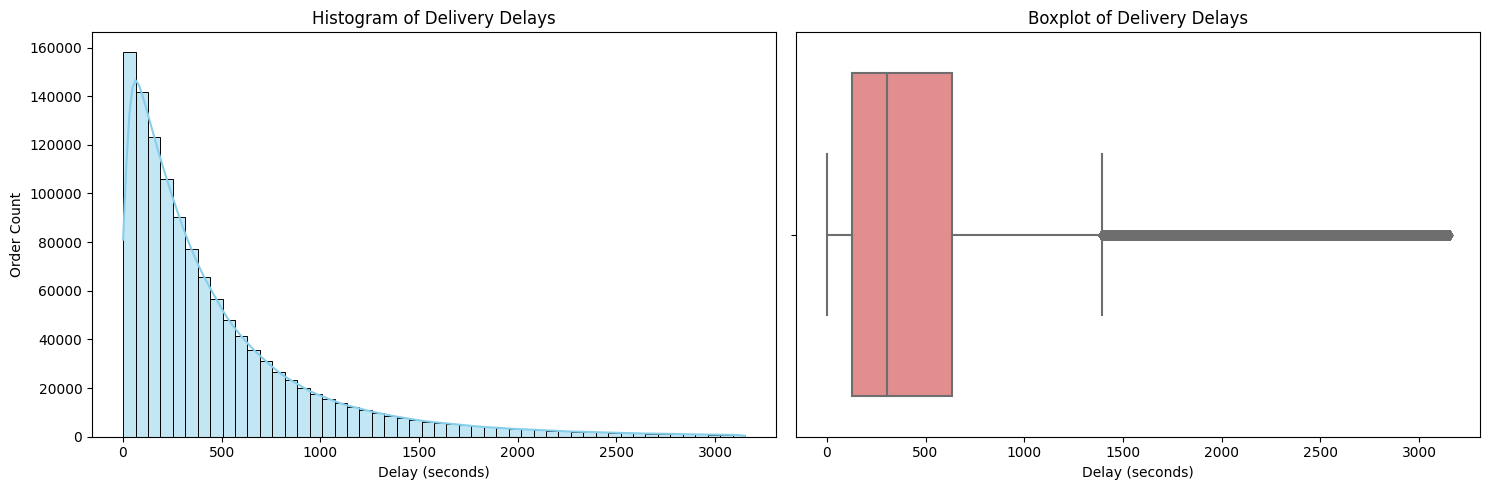

In [71]:
# Calculate delay in seconds
delv = deliveries[deliveries['delivery_delay_secs'] > 0]  
a = delv['delivery_delay_secs'].quantile(0.99)
deliver = delv[delv['delivery_delay_secs']<a]

plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(deliver['delivery_delay_secs'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Delivery Delays')
plt.xlabel('Delay (seconds)')
plt.ylabel('Order Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=deliver['delivery_delay_secs'], color='lightcoral')
plt.title('Boxplot of Delivery Delays')
plt.xlabel('Delay (seconds)')

plt.tight_layout()
plt.show()

In [72]:
delay_summary = deliveries['delivery_delay_secs'].describe(percentiles=[0.25, 0.5, 0.75, 0.9])
delay_summary

count    3.367876e+06
mean    -1.578251e+02
std      7.721362e+02
min     -5.159700e+04
25%     -5.030000e+02
50%     -1.610000e+02
75%      1.680000e+02
90%      6.010000e+02
max      1.932100e+04
Name: delivery_delay_secs, dtype: float64

### Order delay classification - Noticeable and long delay

In [73]:
def classify_delay(d):
    if (d>600) & (d<=900):
        return '10-15 min late'
    elif (d>900) & (d<=1800):
        return '15-30 min late'
    elif d>1800:
        return '>30 min late'
    else: 
        return 'not late'

deliveries['delay_bucket'] = deliveries['delivery_delay_secs'].apply(classify_delay)

delay_bucket = ['not late', '10-15 min late', '15-30 min late', '>30 min late']

delay_summary = deliveries.groupby('delay_bucket')['enc_order_id'].count().reset_index()
delay_summary.columns = ['delay_bucket', 'order_count']

delay_summary['delay_bucket'] = pd.Categorical(delay_summary['delay_bucket'], categories=delay_bucket, ordered=True)

delay_summary = delay_summary.sort_values('delay_bucket')

total_delayed_orders = delay_summary['order_count'].sum()
delay_summary['pct_of_delayed_orders'] = (delay_summary['order_count'] / total_delayed_orders * 100).round(2)

delay_summary

,delay_bucket,order_count,pct_of_delayed_orders
3,not late,3116105,90.25
0,10-15 min late,141532,4.10
1,15-30 min late,141678,4.10
2,>30 min late,53583,1.55


In [74]:
df = pd.merge(df,deliveries[['enc_order_id', 'country_code', 'delay_bucket']],on=['enc_order_id', 'country_code'], how='left')
df.head()

,country_code,enc_order_id,enc_customer_id,vertical,order_placed_at,status,order_value,cancelled_at,cancellation_owner,delivery_status_new,delivery_delay_secs,contact_reason,served_chat_ind,missed_chat_ind,order_type,is_cancelled,is_delayed,has_contact,issue_type,delay_bucket
0,MY,e3efd320f9b7,44d967520153,Restaurants,2021-03-29 04:50:36+00:00,DELIVERED,2.00,NaN,NaN,completed,93.0,NaN,NaN,NaN,seamless,0,0,0,COMPLETED,not late
1,MY,7147c1ffac6f,96848de95c01,Restaurants,2021-03-27 07:49:51+00:00,DELIVERED,2.07,NaN,NaN,delay,1692.0,NaN,NaN,NaN,non_seamless,0,1,0,DELAY,15-30 min late
2,MY,79343f6c20af,2e0142712577,Groceries,2021-03-03 08:25:52+00:00,DELIVERED,2.74,NaN,NaN,completed,267.0,NaN,NaN,NaN,seamless,0,0,0,COMPLETED,not late
3,MY,439217952d53,fc8759fabaa8,Restaurants,2021-03-16 05:32:37+00:00,DELIVERED,2.04,NaN,NaN,completed,-335.0,NaN,NaN,NaN,seamless,0,0,0,COMPLETED,not late
4,MY,3eeb2e8008b5,13e582c8cd6d,Restaurants,2021-03-24 07:22:14+00:00,DELIVERED,2.90,NaN,NaN,completed,270.0,NaN,NaN,NaN,seamless,0,0,0,COMPLETED,not late


In [75]:
df[['enc_order_id','cancellation_owner','delay_bucket']].groupby(['cancellation_owner','delay_bucket']).count()

enc_order_id
cancellation_owner delay_bucket                
CUSTOMER           10-15 min late            23
                   15-30 min late            42
                   >30 min late              41
                   not late               42302
PLATFORM           not late                  18
RIDER              10-15 min late           165
                   15-30 min late           212
                   >30 min late             185
                   not late               34313
VENDOR             10-15 min late             7
                   15-30 min late            13
                   >30 min late               6
                   not late               38238

In [76]:
df[['enc_order_id','delay_bucket']].groupby(['delay_bucket']).count()

,enc_order_id
delay_bucket,
10-15 min late,141532
15-30 min late,141678
>30 min late,53583
not late,3116105


In [77]:
r = df[['delay_bucket','vertical','enc_order_id']].groupby(['delay_bucket','vertical']).count().reset_index()
r = r.rename(columns={'enc_order_id': 'count'})
p = r.pivot(index='delay_bucket', columns='vertical', values='count').fillna(0)
p

vertical,Groceries,Local shops,Restaurants
delay_bucket,,,
10-15 min late,2431,2298,136802
15-30 min late,3076,2404,136198
>30 min late,2310,1106,50166
not late,57703,69867,2988519


### Issues -> Customer Service contact

In [78]:
df.groupby('issue_type').agg(
    order_count=('enc_order_id', 'nunique'),
    has_contact_sum=('has_contact', 'sum')
).reset_index()

,issue_type,order_count,has_contact_sum
0,CANCELLATION,125720,11713
1,COMPLETED,2970916,0
2,CONTACT,28373,28373
3,DELAY,335850,16999


### Delay order - customer service contact

In [79]:
df.groupby('delay_bucket').agg(
    order_count=('enc_order_id', 'nunique'),
    has_contact_sum=('has_contact', 'sum')
).reset_index()

,delay_bucket,order_count,has_contact_sum
0,10-15 min late,141532,2721
1,15-30 min late,141678,6176
2,>30 min late,53583,8645
3,not late,3116102,39439


In [80]:
# Total number of contact events
contact_event = df[df['has_contact']>0]
total_contacts = contact_event.shape[0]

contact_event['served_chat_ind'] = np.where(contact_event['served_chat_ind']>0,1,0)
contact_event['missed_chat_ind'] = np.where(contact_event['missed_chat_ind']>0,1,0)

# Count served and missed
served_count = contact_event['served_chat_ind'].sum()
missed_count = contact_event['missed_chat_ind'].sum()

# Percentages
served_pct = round(served_count / total_contacts * 100, 1)
missed_pct = round(missed_count / total_contacts * 100, 1)

contact_summary = pd.DataFrame({
    'Type': ['Served Chats', 'Missed Chats'],
    'Count': [served_count, missed_count],
    'Percent': [f"{served_pct}%", f"{missed_pct}%"]
})
contact_summary

,Type,Count,Percent
0,Served Chats,55720,97.6%
1,Missed Chats,2810,4.9%


In [81]:
df[df['delay_bucket']=='>30 min late']['issue_type'].count()

53583